In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target,
                                                                      test_size = 0.2, random_state = 42)

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
def model_fn(a_layer = None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape = (28, 28)))
  model.add(keras.layers.Dense(100, activation = 'relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation = 'softmax'))
  return model

In [4]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 5, verbose = 0)

In [6]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


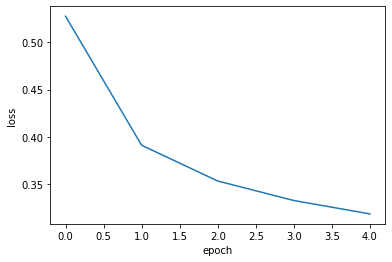

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

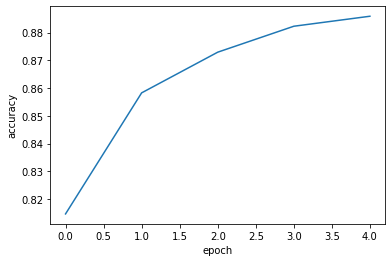

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

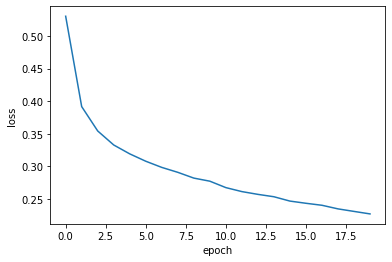

In [9]:
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

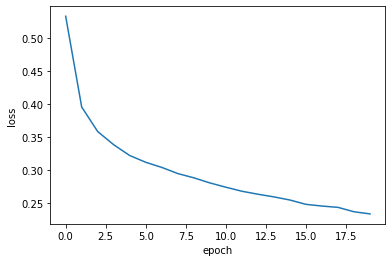

In [10]:
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0,
                    validation_data = (val_scaled, val_target))
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [11]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


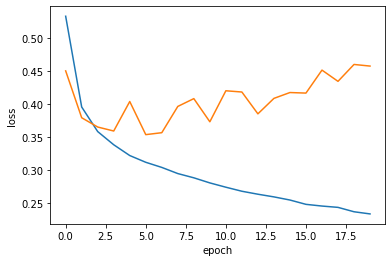

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

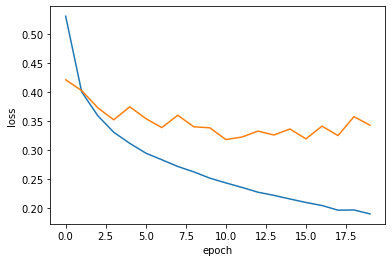

In [13]:
model = model_fn()
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0,
                    validation_data = (val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [14]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


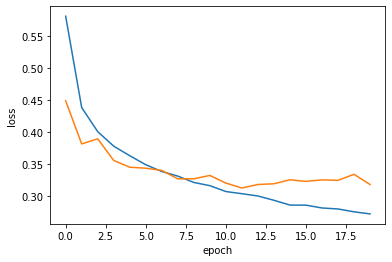

In [15]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0,
                    validation_data = (val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [16]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 10, validation_data = (val_scaled, val_target))

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5921 - accuracy: 0.7917 - val_loss: 0.4187 - val_accuracy: 0.8493
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4387 - accuracy: 0.8424 - val_loss: 0.3985 - val_accuracy: 0.8510
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4046 - accuracy: 0.8537 - val_loss: 0.3892 - val_accuracy: 0.8554
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3790 - accuracy: 0.8624 - val_loss: 0.4005 - val_accuracy: 0.8567
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3675 - accuracy: 0.8658 - val_loss: 0.3581 - val_accuracy: 0.8699
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3527 - accuracy: 0.8702 - val_loss: 0.3394 - val_accuracy: 0.8752
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3423 - accuracy: 0.8733 - val_loss: 0.3424 - val_accuracy:

In [17]:
model.save_weights('model_weights.h5')
model.save('model-whole.h5')

In [18]:
!ls -al *.h5

-rw-r--r-- 1 root root 333448 Apr 22 13:31 model_weights.h5
-rw-r--r-- 1 root root 982664 Apr 22 13:31 model-whole.h5


In [19]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model_weights.h5')

In [20]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis = -1)
print(np.mean(val_labels == val_target))

0.8814166666666666


In [21]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3255 - accuracy: 0.8814


[0.3254656195640564, 0.8814166784286499]

In [22]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.h5')
model.fit(train_scaled, train_target, epochs = 20,
          validation_data = (val_scaled, val_target),
          callbacks = [checkpoint_cb])

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5879 - accuracy: 0.7941 - val_loss: 0.4494 - val_accuracy: 0.8364
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4401 - accuracy: 0.8420 - val_loss: 0.3988 - val_accuracy: 0.8547
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4034 - accuracy: 0.8530 - val_loss: 0.3596 - val_accuracy: 0.8664
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3815 - accuracy: 0.8584 - val_loss: 0.3576 - val_accuracy: 0.8665
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3652 - accuracy: 0.8663 - val_loss: 0.3481 - val_accuracy: 0.8735
Epoch 6/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3528 - accuracy: 0.8697 - val_loss: 0.3409 - val_accuracy: 0.8763
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3451 - accuracy: 0.8724 - val_loss: 0.3483 - val_accuracy:

In [25]:
model = keras.models.load_model('best_model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 4ms/step - loss: 0.3251 - accuracy: 0.8866


[0.3250742256641388, 0.8865833282470703]

In [28]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)
history = model.fit(train_scaled, train_target, epochs = 20,
                    validation_data = (val_scaled, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5831 - accuracy: 0.7953 - val_loss: 0.4347 - val_accuracy: 0.8395
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4347 - accuracy: 0.8435 - val_loss: 0.3866 - val_accuracy: 0.8596
Epoch 3/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4022 - accuracy: 0.8535 - val_loss: 0.3594 - val_accuracy: 0.8688
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3784 - accuracy: 0.8610 - val_loss: 0.3450 - val_accuracy: 0.8717
Epoch 5/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3634 - accuracy: 0.8659 - val_loss: 0.3499 - val_accuracy: 0.8734
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3503 - accuracy: 0.8715 - val_loss: 0.3326 - val_accuracy: 0.8793
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3426 - accuracy: 0.8749 - val_loss: 0.3342 - val_accuracy:

In [29]:
print(early_stopping_cb.stopped_epoch)

11


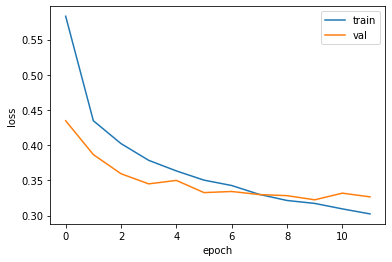

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [31]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 4ms/step - loss: 0.3223 - accuracy: 0.8838


[0.32233789563179016, 0.8838333487510681]